<a href="https://colab.research.google.com/github/PrinceBasnet/ui/blob/master/opencv_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/DatumLearning/Faster_RCNN_Opencv.git

Cloning into 'Faster_RCNN_Opencv'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 8 (from 1)
Receiving objects: 100% (18/18), 57.35 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
import numpy as np
import random
import time
import cv2
import os
from google.colab.patches import cv2_imshow

In [5]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [6]:
weightsPath = "/content/Faster_RCNN_Opencv/frozen_inference_graph.pb"
configPath = "/content/Faster_RCNN_Opencv/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [7]:
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

In [8]:
image = cv2.imread("/content/zebro.png")
(H, W) = image.shape[:2]

In [9]:
blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)

In [10]:
net.setInput(blob)

In [11]:
boxes = net.forward(["detection_out_final"])

In [12]:
output = boxes[0].squeeze()

In [13]:
output

array([[0.        , 0.        , 0.9936562 , 0.64699405, 0.45321766,
        0.7762267 , 0.9160601 ],
       [0.        , 0.        , 0.9277973 , 0.7670851 , 0.45510957,
        0.85546017, 0.8563509 ],
       [0.        , 0.        , 0.9175761 , 0.43559006, 0.46853086,
        0.52399176, 0.8364539 ],
       [0.        , 0.        , 0.8818607 , 0.9180796 , 0.44088787,
        0.993888  , 0.79211015],
       [0.        , 0.        , 0.8298345 , 0.56465375, 0.42249298,
        0.65674174, 0.7868445 ],
       [0.        , 0.        , 0.8177968 , 0.2220748 , 0.46631485,
        0.2943734 , 0.8304407 ],
       [0.        , 0.        , 0.7940066 , 0.90310174, 0.02135564,
        1.        , 0.23981471],
       [0.        , 0.        , 0.7557204 , 0.17194925, 0.4512071 ,
        0.24898495, 0.8252302 ],
       [0.        , 0.        , 0.70293236, 0.8268532 , 0.07609466,
        0.91990405, 0.24938872],
       [0.        , 0.        , 0.48589423, 0.35667354, 0.46269807,
        0.42292547, 0.7

In [14]:
output[: , 2][:5] , output[: , 1][:5]

(array([0.9936562, 0.9277973, 0.9175761, 0.8818607, 0.8298345],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32))

In [15]:
output[: , 3:][:5]

array([[0.64699405, 0.45321766, 0.7762267 , 0.9160601 ],
       [0.7670851 , 0.45510957, 0.85546017, 0.8563509 ],
       [0.43559006, 0.46853086, 0.52399176, 0.8364539 ],
       [0.9180796 , 0.44088787, 0.993888  , 0.79211015],
       [0.56465375, 0.42249298, 0.65674174, 0.7868445 ]], dtype=float32)

In [16]:
num = np.argwhere(output[: , 2] > 0.8).shape[0]

In [17]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [18]:
img = cv2.imread("//content/zebro.png")
for i in range(num):
  x1n , y1n , x2n , y2n = output[i , 3:]
  x1 = int(x1n * W)
  y1 = int(y1n * H)
  x2 = int(x2n * W)
  y2 = int(y2n * H)
  img = cv2.rectangle(img , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 3)
  class_name = coco_names[int(output[i , 1])]
  img = cv2.putText(img , class_name , (x1 , y1 - 10) , font , 0.5 ,
                    (255 , 0 , 0) , 1 , cv2.LINE_AA)

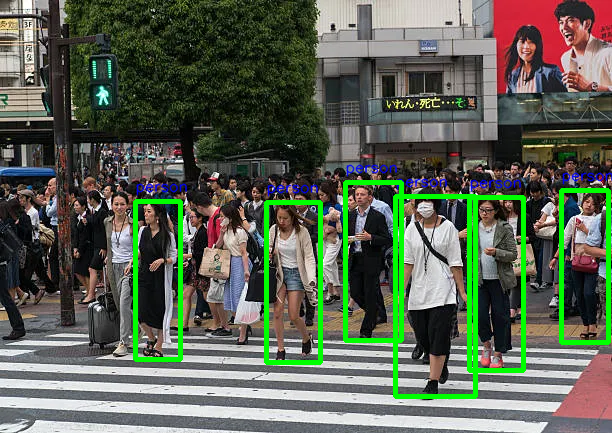

In [19]:
cv2_imshow(img)